In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('Advertising.csv',index_col=0)
df.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [11]:
df.shape

(200, 4)

Basic Observation from the summary of the data

In [ ]:
Max sale is 27 and min is 1.6

In [15]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

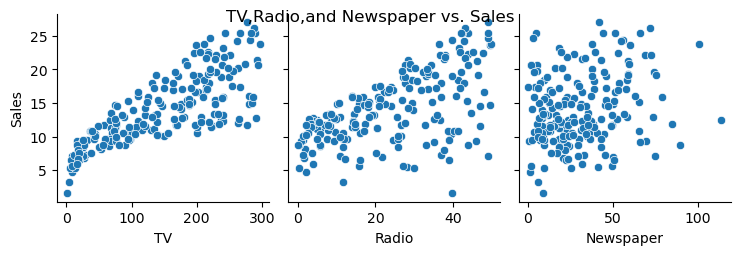

In [20]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'], y_vars='Sales',kind='scatter')

plt.suptitle("TV,Radio,and Newspaper vs. Sales")
plt.show()

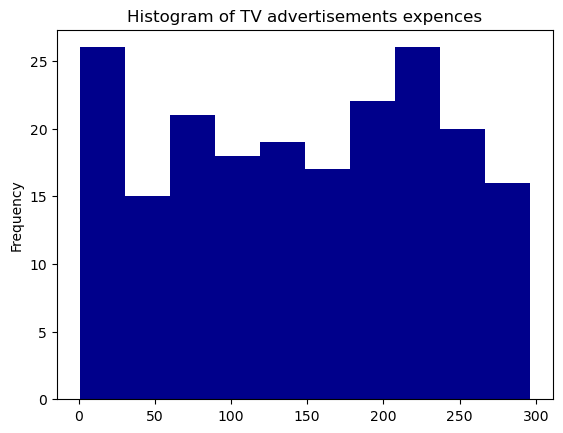

In [25]:
df['TV'].plot.hist(bins=10,color="darkblue",title="Histogram of TV advertisements expences")
plt.show()

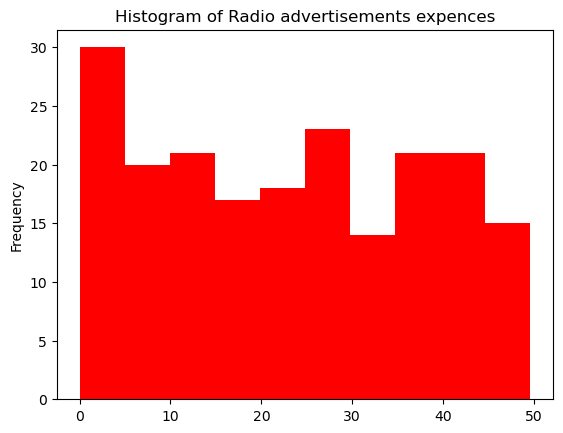

In [27]:
df['Radio'].plot.hist(bins=10,color="red",title="Histogram of Radio advertisements expences")
plt.show()

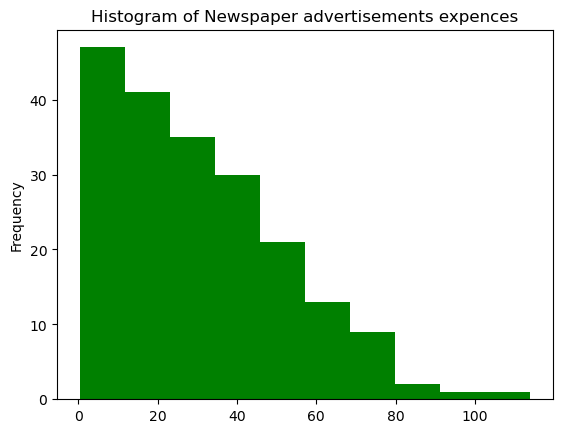

In [28]:
df['Newspaper'].plot.hist(bins=10,color="green",title="Histogram of Newspaper advertisements expences")
plt.show()

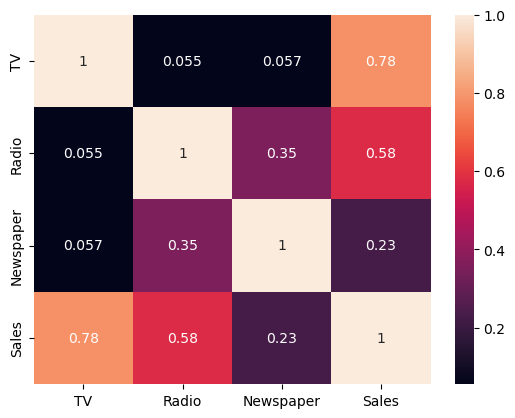

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Lets Train our model using Linear Regression as it is correlated with only one variable TV.

In [34]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['TV']],df[['Sales']],test_size=0.3,random_state=0)

We have randomly splitted our Whole dataset into two parts we have taken 70% of the random observations as training set which we use will use
to train our model and the remaining 30% of the observations will be used as test data which we will use to test our model.

In [35]:
X_train.shape

(140, 1)

Our training set has 140 observations

In [36]:

print(X_train)

        TV
132  265.2
97   197.6
182  218.5
20   147.3
154  171.3
..     ...
68   139.3
193   17.2
118   76.4
48   239.9
173   19.6

[140 rows x 1 columns]


In [37]:
print(X_test)

        TV
19    69.2
171   50.0
108   90.4
99   289.7
178  170.2
183   56.2
6      8.7
147  240.1
13    23.8
153  197.6
62   261.3
126   87.2
181  156.6
155  187.8
81    76.4
8    120.2
34   265.6
131    0.7
38    74.7
75   213.4
184  287.6
146  140.3
46   175.1
160  131.7
61    53.5
124  123.1
180  165.6
186  205.0
123  224.0
45    25.1
17    67.8
56   198.9
151  280.7
112  241.7
23    13.2
190   18.7
130   59.6
5    180.8
84    68.4
107   25.0
135   36.9
67    31.5
27   142.9
114  209.6
169  215.4
64   102.7
9      8.6
76    16.9
119  125.7
144  104.6
72   109.8
125  229.5
185  253.8
98   184.9
150   44.7
25    62.3
31   292.9
161  172.5
41   202.5
57     7.3


In [38]:
print(y_train)

     Sales
132   12.7
97    11.7
182   12.2
20    14.6
154   19.0
..     ...
68    13.4
193    5.9
118    9.4
48    23.2
173    7.6

[140 rows x 1 columns]


In [ ]:
print(y_test)

     Sales
19    11.3
171    8.4
108    8.7
99    25.4
178   11.7
183    8.7
6      7.2
147   13.2
13     9.2
153   16.6
62    24.2
126   10.6
181   10.5
155   15.6
81    11.8
8     13.2
34    17.4
131    1.6
38    14.7
75    17.0
184   26.2
146   10.3
46    14.9
160   12.9
61     8.1
124   15.2
180   12.6
186   22.6
123   11.6
45     8.5
17    12.5
56    23.7
151   16.1
112   21.8
23     5.6
190    6.7
130    9.7
5     12.9
84    13.6
107    7.2
135   10.8
67     9.5
27    15.0
114   15.9
169   17.1
64    14.0
9      4.8
76     8.7
119   15.9
144   10.4
72    12.4
125   19.7
185   17.6
98    15.5
150   10.1
25     9.7
31    21.4
161   14.4
41    16.6
57     5.5


## Model Building

In [43]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
predicted=model.predict(X_test)
print(predicted)

[[10.48116264]
 [ 9.60152727]
 [11.4524267 ]
 [20.58322509]
 [15.1084112 ]
 [ 9.8855762 ]
 [ 7.70939494]
 [18.31083372]
 [ 8.40119151]
 [16.36372418]
 [19.28209777]
 [11.3058208 ]
 [14.48533615]
 [15.91474363]
 [10.81102591]
 [12.81769409]
 [19.47909945]
 [ 7.3428802 ]
 [10.73314153]
 [17.08759078]
 [20.48701497]
 [13.73856237]
 [15.33290148]
 [13.34455903]
 [ 9.76187747]
 [12.95055569]
 [14.89766523]
 [16.70275031]
 [17.57322281]
 [ 8.46075015]
 [10.41702256]
 [16.42328282]
 [20.17089601]
 [18.38413667]
 [ 7.91555948]
 [ 8.16753836]
 [10.04134496]
 [15.59404323]
 [10.44451117]
 [ 8.45616872]
 [ 9.00135939]
 [ 8.75396194]
 [13.85767966]
 [16.91349628]
 [17.17921947]
 [12.01594311]
 [ 7.70481351]
 [ 8.08507255]
 [13.06967298]
 [12.10299036]
 [12.34122494]
 [17.82520169]
 [18.93849021]
 [15.78188203]
 [ 9.35871126]
 [10.16504368]
 [20.72983099]
 [15.21378419]
 [16.58821446]
 [ 7.64525486]]


In [54]:
print(model.coef_)

print(model.intercept_)

[[0.04581434]]
[7.31081017]


In [52]:
# Checking for one test observation
0.04581434*69.2+7.31081017

10.481162498

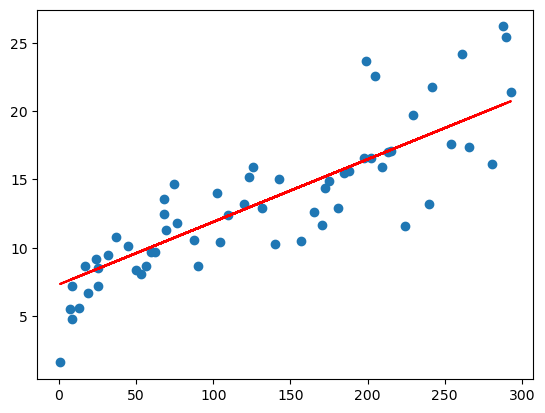

In [55]:
plt.scatter(X_test,y_test)
plt.plot(X_test,7.31081017 + 0.04581434* X_test,'r')
plt.show()